<h1 style="text-align:center;">Data Science & Society Thesis</h1>
<h3 style="text-align:center;">FORECASTING CRYPTO PRICE  PEAKS: REGRESSION – BASED </h3>
<h3 style="text-align:center;">TIME – UNTIL – NEW - HIGH </h3>
<h3 style="text-align:center;">PREDICTIONS</h3>
<h5 style="text-align:center;"> ELEFTHERIOS DIAMANTIDIS</h5>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Prevent line-wrapping

## <span style='color:brown'>**Radar Plot (Spider Chart) – Per Model Average Performance** </span>

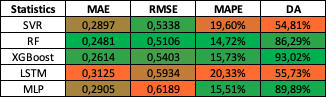

In [2]:
# 1) Raw statistics
data = {
    "MAE":   [0.2897, 0.2481, 0.2614, 0.3125, 0.2905],
    "RMSE":  [0.5338, 0.5106, 0.5403, 0.5934, 0.6189],
    "MAPE":  [19.60,  14.72,  15.73,  20.33,  15.51],
    "DA":    [54.81,  86.29,  93.02,  55.73,  89.89]
}
models = ["SVR", "RF", "XGBoost", "LSTM", "MLP"]
df = pd.DataFrame(data, index=models)

In [3]:
print(df)

            MAE    RMSE   MAPE     DA
SVR      0.2897  0.5338  19.60  54.81
RF       0.2481  0.5106  14.72  86.29
XGBoost  0.2614  0.5403  15.73  93.02
LSTM     0.3125  0.5934  20.33  55.73
MLP      0.2905  0.6189  15.51  89.89


In [4]:
# 2) Normalize to [0,1]:
#    - For errors (MAE, RMSE, MAPE), invert so smaller error → higher score
#    - For DA, simply scale by 100
df_norm = pd.DataFrame(index=models)
for metric in ["MAE","RMSE","MAPE"]:
    df_norm[metric] = 1 - df[metric] / df[metric].max()
df_norm["DA"] = df["DA"] / 100

In [6]:
# 3) Radar setup
metrics = ["MAE","RMSE","MAPE","DA"]
N = len(metrics)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

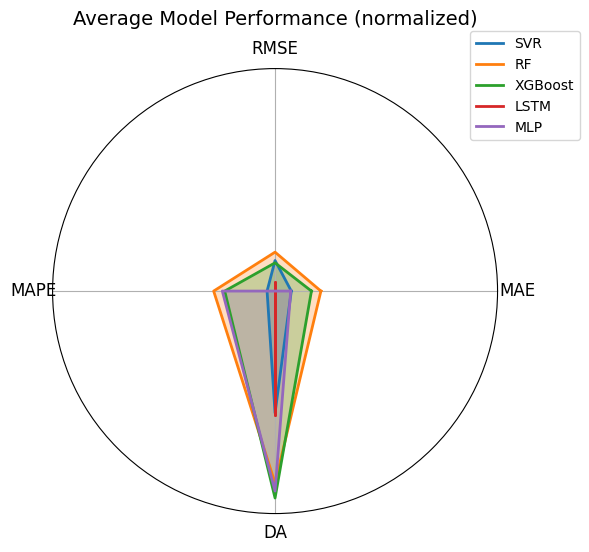

In [9]:
# 4) Plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for model in models:
    vals = df_norm.loc[model, metrics].tolist()
    vals += vals[:1]  # close the loop
    ax.plot(angles, vals, label=model, linewidth=2)
    ax.fill(angles, vals, alpha=0.25)
    
# 5) Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
ax.set_yticks([])  # hide radial grid labels
ax.set_ylim(0,1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.set_title("Average Model Performance (normalized)", y=1.08, fontsize=14)
plt.savefig("plots/radar_plot.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## <span style='color:brown'>**Feature Importance Summary** </span>

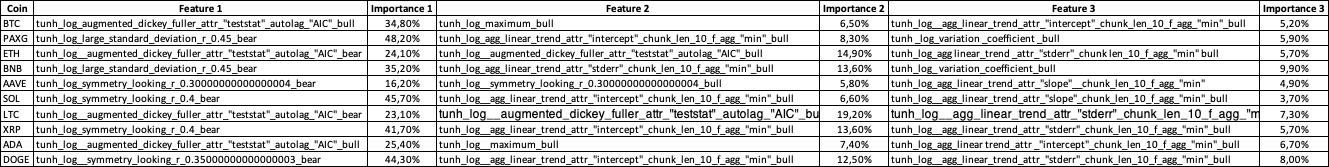

In [22]:
# ─── 1) Build the wide DataFrame for top-3 per coin ───────────────────────────
data = [
    {
        "Coin": "BTC",
        "Feature_1": 'tunh_log_augmented_dickey_fuller_attr_"teststat"_autolag_"AIC"_bull',
        "Importance_1": 34.80,
        "Feature_2": "tunh_log_maximum_bull",
        "Importance_2": 6.50,
        "Feature_3": 'tunh_log__agg_linear_trend_attr_"intercept"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 5.20,
    },
    {
        "Coin": "PAXG",
        "Feature_1": "tunh_log_large_standard_deviation_r_0.45_bear",
        "Importance_1": 48.20,
        "Feature_2": 'tunh_log_agg_linear_trend_attr_"intercept"_chunk_len_10_f_agg_"min"_bull',
        "Importance_2": 8.30,
        "Feature_3": "tunh_log_variation_coefficient_bull",
        "Importance_3": 5.90,
    },
    {
        "Coin": "ETH",
        "Feature_1": 'tunh_log__augmented_dickey_fuller_attr_"teststat"_autolag_"AIC"_bear',
        "Importance_1": 24.10,
        "Feature_2": 'tunh_log__augmented_dickey_fuller_attr_"teststat"_autolag_"AIC"_bull',
        "Importance_2": 14.90,
        "Feature_3": 'tunh_log_agg_linear_trend_attr_"stderr"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 5.70,
    },
    {
        "Coin": "BNB",
        "Feature_1": "tunh_log_large_standard_deviation_r_0.45_bear",
        "Importance_1": 35.20,
        "Feature_2": 'tunh_log_agg_linear_trend_attr_"stderr"_chunk_len_10_f_agg_"min"_bull',
        "Importance_2": 13.60,
        "Feature_3": "tunh_log_variation_coefficient_bull",
        "Importance_3": 9.90,
    },
    {
        "Coin": "AAVE",
        "Feature_1": 'tunh_log_symmetry_looking_r_0.30000000000000004_bear',
        "Importance_1": 16.20,
        "Feature_2": 'tunh_log__symmetry_looking_r_0.30000000000000004_bull',
        "Importance_2": 5.80,
        "Feature_3": 'tunh_log_agg_linear_trend_attr_"slope"__chunk_len_10_f_agg_"min"',
        "Importance_3": 4.90,
    },
    {
        "Coin": "SOL",
        "Feature_1": "tunh_log_symmetry_looking_r_0.4_bear",
        "Importance_1": 45.70,
        "Feature_2": 'tunh_log__agg_linear_trend_attr_"intercept"_chunk_len_10_f_agg_"min"_bull',
        "Importance_2": 6.60,
        "Feature_3": 'tunh_log__agg_linear_trend_attr_"slope"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 3.70,
    },
    {
        "Coin": "LTC",
        "Feature_1": 'tunh_log__augmented_dickey_fuller_attr_"teststat"_autolag_"AIC"_bear',
        "Importance_1": 23.10,
        "Feature_2": 'tunh_log__augmented_dickey_fuller_attr_"teststat"_autolag_"AIC"_bull',
        "Importance_2": 19.20,
        "Feature_3": 'tunh_log__agg_linear_trend_attr_"stderr"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 7.30,
    },
    {
        "Coin": "XRP",
        "Feature_1": "tunh_log_symmetry_looking_r_0.4_bear",
        "Importance_1": 41.70,
        "Feature_2": 'tunh_log__agg_linear_trend_attr_"intercept"_chunk_len_10_f_agg_"min"_bull',
        "Importance_2": 13.60,
        "Feature_3": 'tunh_log__agg_linear_trend_attr_"stderr"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 5.70,
    },
    {
        "Coin": "ADA",
        "Feature_1": 'tunh_log__augmented_dickey_fuller_attr_"teststat"_autolag_"AIC"_bull',
        "Importance_1": 25.40,
        "Feature_2": "tunh_log_maximum_bull",
        "Importance_2": 7.40,
        "Feature_3": 'tunh_log_agg_linear_trend_attr_"intercept"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 6.70,
    },
    {
        "Coin": "DOGE",
        "Feature_1": 'tunh_log__symmetry_looking_r_0.35000000000000003_bear',
        "Importance_1": 44.30,
        "Feature_2": 'tunh_log__agg_linear_trend_attr_"intercept"_chunk_len_10_f_agg_"min"_bull',
        "Importance_2": 12.50,
        "Feature_3": 'tunh_log__agg_linear_trend_attr_"stderr"_chunk_len_10_f_agg_"min"_bull',
        "Importance_3": 8.00,
    },
]

df_top3 = pd.DataFrame(data).set_index("Coin")

In [23]:
print(df_top3.head())

                                              Feature_1  Importance_1                                          Feature_2  Importance_2                                          Feature_3  Importance_3
Coin                                                                                                                                                                                                   
BTC   tunh_log_augmented_dickey_fuller_attr_"teststa...          34.8                              tunh_log_maximum_bull           6.5  tunh_log__agg_linear_trend_attr_"intercept"_ch...           5.2
PAXG      tunh_log_large_standard_deviation_r_0.45_bear          48.2  tunh_log_agg_linear_trend_attr_"intercept"_chu...           8.3                tunh_log_variation_coefficient_bull           5.9
ETH   tunh_log__augmented_dickey_fuller_attr_"testst...          24.1  tunh_log__augmented_dickey_fuller_attr_"testst...          14.9  tunh_log_agg_linear_trend_attr_"stderr"_chunk_...           5.7


In [24]:
# ─── 2) Melt into long form ────────────────────────────────────────────────────
long_rows = []
for coin, row in df_top3.iterrows():
    for r in (1, 2, 3):
        long_rows.append({
            "Coin": coin,
            "Rank": r,
            "Feature": row[f"Feature_{r}"],
            "Importance": row[f"Importance_{r}"]
        })
df_long = pd.DataFrame(long_rows)

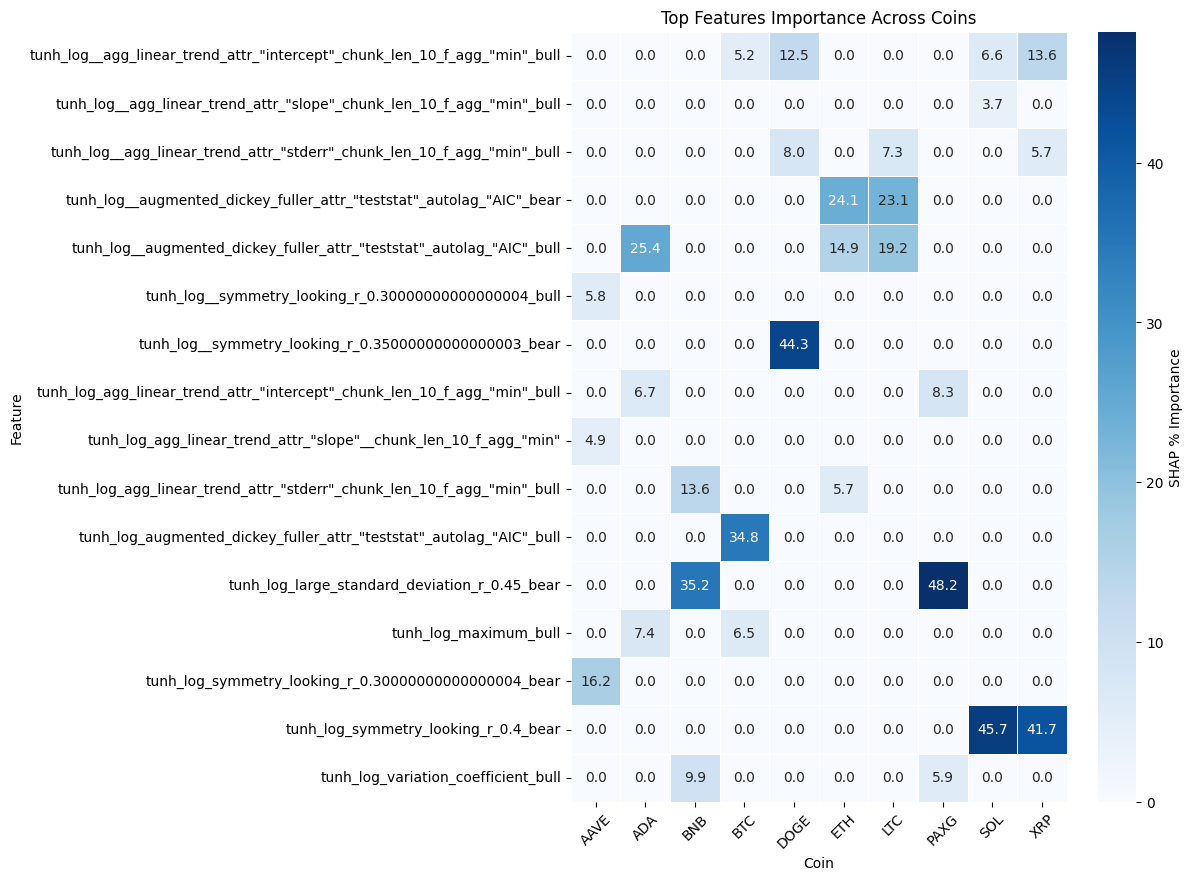

In [31]:
# Pivot to wide form: rows = Feature, cols = Coin
df_heat = df_long.pivot(index="Feature", columns="Coin", values="Importance").fillna(0)

plt.figure(figsize=(8, 10))
sns.heatmap(
    df_heat,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar_kws={"label": "SHAP % Importance"},
    linewidths=0.5
)
plt.title("Top Features Importance Across Coins")
plt.xlabel("Coin")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("plots/heatmap_top_features.png", dpi=300, bbox_inches='tight')
plt.show()